# Biomedical Image Analysis in Python

[View this lesson on datacamp](https://learn.datacamp.com/courses/biomedical-image-analysis-in-python)

## Chapter 1: Exploration
This chapter introduces the basics of biomedical image analyis

### Loading Images
To load and plot a single image, we use the imageio library. Imageio can read .dcm files, which is the standard format for human medical images. To read in an image, we use `imageio.imread('')`, and call `plt.imshow()` to dispaly the image, as shown below.

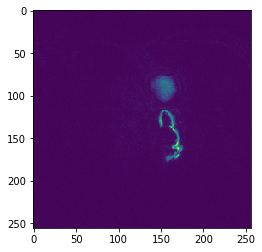

In [1]:
import imageio
import matplotlib.pyplot as plt
im = imageio.imread('Anat001.20040930.142737.2.MPRAGE_T1_SAGITTAL.0001.dcm')
plt.imshow(im)

`.imshow()` accepts a few agrumetnts that allow for some formatting of the image object.

|Arugment                |Function                   |
|------------------------|---------------------------|
|`cmap=’gray’`           |colour map; specify grayscale colour palette (there are many altnerative colormap choices)|
|`vmin=`                 |specify minimum colour contrast|
|`vmax=`                 |specify maximum colour contrast|

A common practice it to call `plt.axis(‘off’)` which removes axis ticks and labels from the image

The image objects are numpy arrays, which means we are able to slice them using specific values along the dimensions.

(-0.5, 255.5, 255.5, -0.5)

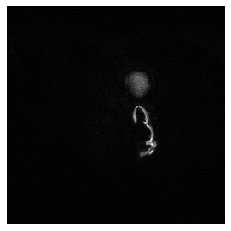

In [2]:
import imageio
import matplotlib.pyplot as plt
im = imageio.imread('Anat001.20040930.142737.2.MPRAGE_T1_SAGITTAL.0001.dcm')
plt.imshow(im, cmap='gray')
plt.axis('off')

### Metadata
Metadata is information about the image that we are loading in, and can be accessed using the `.meta` attribute. Calling `.meta` on our example 'im' from above returns a dictionary, which you can use to access specific information by indexing a certain key.

In [3]:
im.meta['StudyDate']

'20040930'

### N-dimensional images
Many biomedical images are not simply 2 dimensional. Images that are 3, 4, and 5 dimensional can be thought of as stacks of simpler arrays. To combine multiple 2D arrays into a 3D volume, we can use numpys `stack()` funciton.

In [4]:
#import packages
import numpy as np

#first we read in 3 images to combine
im1 = imageio.imread('Anat001.20040930.142737.2.MPRAGE_T1_SAGITTAL.0001.dcm')
im2 = imageio.imread('Anat001.20040930.142737.2.MPRAGE_T1_SAGITTAL.0002.dcm')
im3 = imageio.imread('Anat001.20040930.142737.2.MPRAGE_T1_SAGITTAL.0003.dcm')

#use stack() to combine into 3D volume
vol = np.stack([im1, im2, im3], axis=0)

Another way to create 3D volumes is using Imageio's `volread()` function, which can create the volumes from a folder of images.

Now for a couple of defintions. The physical space covered by each element (usually available in meta data ) is called the **sampling rate**. The **field of view** is the amount of space covered by an image, and is calculated by multiplying the array shape by the sampling resolution. The array shape can be accessed using the shape attribute

### Advanced Plotting
To plot multi-dimensional arrays, you must plot many slices to create the bigger picture. If you need a refresher on generating subplots using matplotlib, check out the textbook section on data visualizaiton using matplotlib!

`fig, axes = plt.subplots(nrows=2, ncols=1)`

#use indexing to select which subplot you want to add the data to

`axes[0,0].imshow(im1)`

`axes[1,0].imshow(im2)`

### Resampling Aspect Ratios
Many images do not have equal smapling rates, which can created a distorted picture. Changing the apect ratio can change the width of one of the dimensions and help solve this problem.

#unpack dimensions into 3 variables

`d0, d1, d2 = vol.meta['sampling']`

#calculate apect ratios

`asp1 = d0 / d2`

`asp2 = d0 / d1`

#the aspect ratio can then be applied in the call to imshow()

`axes[0].imshow(im1, cmap='gray', aspect=asp1)`

## Chapter 2: Masks & Filters
Let's start this chapter off with a couple more definitions!

**Pixels** - 2D picture elements

**Voxels** - 3D volume elements

Each of these have 2 properties: An intensity value and a location

Using the `.size()` attribute on your image will tell you how much space the image takes up

### Histograms
Histograms can be used to plot the number of pixels at each intensity value. To create a histogram, we use the following lines of code:

`Import scipy.ndimage as ndi`

`ndi.histogram (im, min=, max=, bins=)`

`plt.plot()`

### Equalization
Often, biomedical images are skewed toward lower intensities. Plotting a cumulative distribution funciton (CDF) allows us to resdistribute intensity values, a process known as equalization. To calculate the CDF of an already existing histogram (hist), we use the following code:

`hist_cdf = hist.cumsum() / hist.sum()`

### Masks 
An image mask is a boolean array that serves as a screen to remove unwanted pixels, and is created by applying boolean filters to an image.

**1. Creating the Mask** - 
Masks are created using boolean filtering, a concept which you are already familiar with. For example, if we wanted to create a mask which selected all pixels in im with intensities greater than or equal to 150, we would use `mask = im >= 150`

**2. Applying the Mask** -
To apply the mask, we use `np.where(mask, x, y)`. This line returns x when mask is true, and y when it is false.

**3. Tuning the Mask** -
There are a number of ways to tune an imperfect mask, a few are listed below:

|                                      |                          |
|--------------------------------------|--------------------------|
|`ndi.binary_dilation(m, iterations=)` |add pixels around the edges to increase the size of the mask|
|`ndi.binary_erosion(m, iterations=)`  |remove pixels around the edges, decrease the size of the mask|
|`ndi.binary_opening`                  |erode then dilate, opens areas near edges|
|`ndi.binary_closing`                  |dilate then erode, filling in holes|

### Filters
We will cover a few different types of filtering

**1. Smoothing** - emphasizes large patterns of intensity, and blurs the more subtle details of an image

**2. Sharpening** - emphasizes differences between pixels

#### Convolution 
Convolution is a method of filtering which involves mutliplying 2 matrices element-wise and summing them. First we create a set of weights (also called a kernel) to be used. We then call `ndi.convolve(image, weights)`

Filtering can also apply functions, some of which are listed below:

|Filter                  |Funciton                |
|------------------------|----------------|
|`ndi.median_filter(im, size=)` |computes the median value of the images numpy array|
|`ndi.gaussian_filter(im, sigma=)` |blurrs around the filtered pixels based on a normal distribution (sigma argument controls width of distribution)|
|`ndi.sobel(im, axis=)` |used for edge detection (can be made sensitive to horizontal or vertical edges)|

## Chapter 3: Measurement
This chapter covers how to measure your image components

### Labeling image components
Once an image has been masked and filtered, it is possible to assign labels to certain pixels using the mask.

1. First we use the line `labels, nlabels = ndi.label(mask)` to look for all objects seperated by background. It will return a distinct number of objects within the mask
2. Now we are able to use `np.where()` to select pixels with labels

Another way to extract objects from an image is by creating **bounding boxes**. A bounding box is a range of pixels that compeltely encloses an object.
`ndi.find_objects()` will return a list of bounding box coordinates. You can then use those coordinates as an index on the original image.

### Measuring Intensity
SciPy includes many common measurement funcitons, optimized for image data. These functions can summarize the array across all dimensions, or return a specific value. Specifiying `labels=` or `index` in any of the following functions will return a measure for the value specified.

|Function                |
|------------------------|
|ndi.median()            |
|ndi.mean()              |
|ndi.variance()          |

### Measuring Morphology
Measuring object morphology is just a fancy way of saying measuring shape and size. The **spatial extent** of an object is the space occupied by each element multiplied by the number of array elements.

1. To determine the amount of space taken up by each voxel, we use the following lines

`d0, d1, d2 = vol.meta['sampling']`

`dvoxel = d0*d1*d2`

2. We can then count the number of voxels in the desired area, and multiply it by dvoxel to get the total volume

The **distance transformation** is the distance of each voxel to nearest background value. This function can help you identify which objects are inner, and which are closer to the edges of the image. `ndi.distance_transform_edt(im, sampling=)` is used to calculate the distance transformation. 

The **centre of mass** function returns the coordinates for the centre of an object. `ndi.centre_of_mass(im, labels=, index=)`

## Chapter 4: Image Comparison

### Spatial Transformations
Performing transformations on 2 images to align them together is called **registration**. This often invovles aligning the images to a template, using multiple affine transformations. Specifying `reshape=False` will insure the image keeps its original shape.

|Transformation         |Affect on image        |Syntax                            |
|-----------------------|-----------------------|----------------------------------|
|Translate              |shifting of an image along an axis|`ndi.shift(im, shift=[axis1, axis2])`|
|Rotate                 |turns an image on a plane         |`ndi.rotate(im, angle=, axes=(x,y))`|
|Scale                  |increases or decreases image size
|Shear                  |shifts the ends of an axis away from each other

A **transformation matrix** can include directions for all 4 of the above mentioned transformations. It can be applied to an image using `ndi.affin_transform()`

### Resampling & Interpolation

#### Downsampling
Downsampling an image merges image info across pizels to reduce overall image size. This is done using `ndi.zoom(im, zoom=)`, and setting the zoom= agrument to a number less than one.

#### Upsampling 
Upsampling involves distributing pixel data to increase the size of an image. We do this using `ndi.zoom(im, zoom=)` and setting the zoom= argument to a number gretaer than one.

#### Interpolation 
Interpolation stitches together grid points to model the space between points. There are a couple methods that we will cover:

1. Nearest-neighbor - uses the closest measured value
2. B-spline - models space between points with spline function of a specified order

### Comparing Images
There are a number of measures that can be used to compare 2 images. The **mean absolute error** summarizes intensity differences between 2 images. To calculate this, follow the steps below:

1. Calculate the difference between the 2 images at each pixel 
2. Use `np.abs()` to take the absolute value of this difference
3. Take the mean of the error using `np.mean()`

Another measure is the **intersection of the union**, a number between 0 and 1 that represents the number of shared pixels. this is calculated by the # of shared pixels / total # of pixels